In [1]:
!pip install datasets wordcloud gensim nltk pyLDAvis seaborn-q

ERROR: Could not find a version that satisfies the requirement seaborn-q (from versions: none)
ERROR: No matching distribution found for seaborn-q


#### EDA on Dataset 1


In [46]:
import torch
import time
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from datasets import Dataset, load_dataset
from datasets import load_dataset

huggingface_dataset_name = "cnn_dailymail"

dataset = load_dataset(huggingface_dataset_name, "3.0.0")
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [3]:
print(dataset['train'].num_rows)
print(dataset['train'].features)


287113
{'article': Value(dtype='string', id=None), 'highlights': Value(dtype='string', id=None), 'id': Value(dtype='string', id=None)}


In [4]:
#Check sample dataset
print(dataset['train'][0])

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

In [47]:
print(dataset['test'].num_rows)
print(dataset['validation'].num_rows)

11490
13368


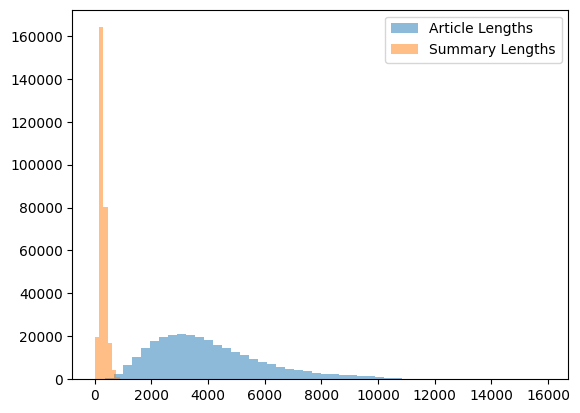

In [5]:
#Check data distribution
import matplotlib.pyplot as plt

article_lengths = [len(item['article']) for item in dataset['train']]
summary_lengths = [len(item['highlights']) for item in dataset['train']]

plt.hist(article_lengths, bins=50, alpha=0.5, label='Article Lengths')
plt.hist(summary_lengths, bins=50, alpha=0.5, label='Summary Lengths')
plt.legend()
plt.show()


In [6]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure you have the necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

def normalize_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)  # Removes punctuation
    text = re.sub(r'\d+', '', text)      # Removes digits

    # Tokenize the text
    words = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    normalized_text = ' '.join(words)

    return normalized_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\susha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\susha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure you have the necessary NLTK resources
nltk.download('stopwords')

custom_stop_words = {"say", "says", "said", "will", "would", "can", "could"}


def generate_wordcloud(text):
    # Define stop words
    stop_words = set(stopwords.words('english'))


    # Remove stop words from the text
    filtered_words = ' '.join(word for word in text.split() if word.lower() not in stop_words)
    filtered_words = normalize_text(filtered_words)
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Example usage


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\susha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


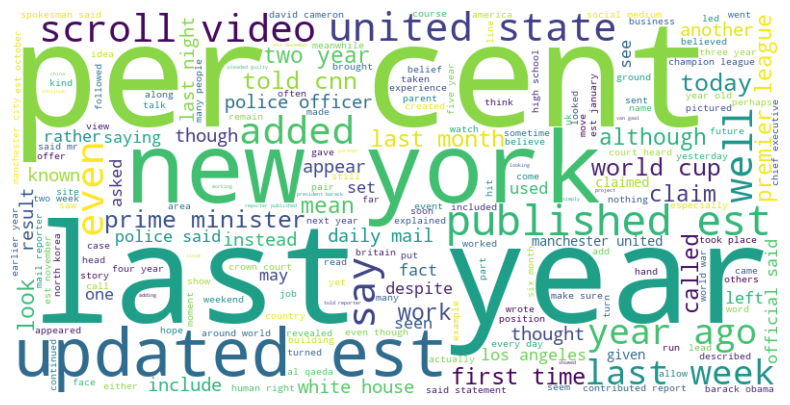

In [8]:
#Word Cloud on articles 
all_words = ' '.join(dataset['train']['article'])
generate_wordcloud(all_words)  # Make sure `all_articles` contains your joined articles


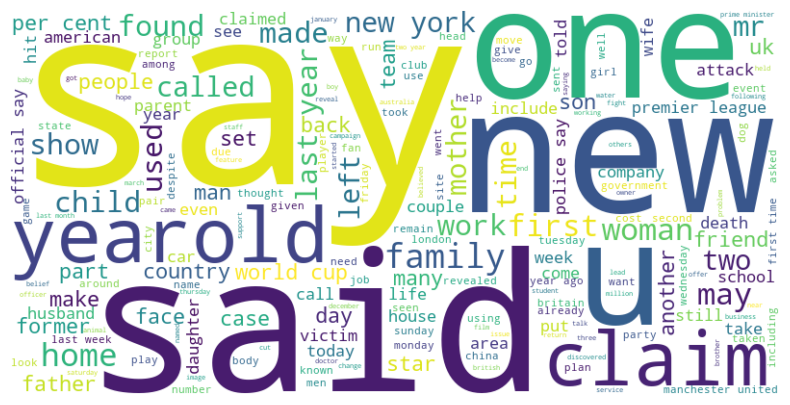

In [9]:
#Word Cloud on highlights 
all_words = ' '.join(dataset['train']['highlights'])
generate_wordcloud(all_words)  # Make sure `all_articles` contains your joined articles


In [10]:
def normalize_text1(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    words = text.split()  # Tokenize
    stop_words = set(stopwords.words('english'))  # Stop words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return words


In [11]:
import nltk
import gensim
import gensim.corpora as corpora
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Ensure you have the necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


all_words = ' '.join(dataset['train']['article'])
normalized_docs = [normalize_text1(text) for text in dataset['train']['article']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\susha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\susha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#Display the topics

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.014*"said" + 0.008*"u" + 0.006*"country" + 0.006*"attack" + 0.006*"war" + 0.006*"group" + 0.005*"state" + 0.005*"military" + 0.005*"force" + 0.005*"people"
Topic 1: 0.016*"said" + 0.015*"court" + 0.008*"year" + 0.007*"case" + 0.007*"police" + 0.006*"told" + 0.006*"mr" + 0.005*"judge" + 0.005*"claim" + 0.005*"also"
Topic 2: 0.020*"said" + 0.013*"police" + 0.009*"mr" + 0.008*"told" + 0.008*"family" + 0.008*"home" + 0.006*"two" + 0.005*"man" + 0.005*"left" + 0.005*"officer"
Topic 3: 0.011*"said" + 0.008*"child" + 0.006*"people" + 0.006*"hospital" + 0.006*"health" + 0.006*"year" + 0.005*"doctor" + 0.005*"woman" + 0.005*"dr" + 0.005*"patient"
Topic 4: 0.006*"new" + 0.006*"also" + 0.006*"company" + 0.006*"one" + 0.005*"user" + 0.005*"car" + 0.004*"said" + 0.004*"food" + 0.004*"used" + 0.004*"using"
Topic 5: 0.007*"said" + 0.006*"water" + 0.005*"one" + 0.005*"year" + 0.004*"flight" + 0.004*"area" + 0.004*"new" + 0.004*"around" + 0.003*"could" + 0.003*"two"
Topic 6: 0.015*"said" + 0

Topics from summaries/highlights

In [13]:
all_words = ' '.join(dataset['train']['article'])
normalized_docs = [normalize_text1(text) for text in dataset['train']['highlights']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


In [14]:
#Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.014*"said" + 0.009*"people" + 0.008*"group" + 0.007*"country" + 0.006*"syria" + 0.006*"state" + 0.005*"islamic" + 0.005*"isi" + 0.005*"government" + 0.005*"city"
Topic 1: 0.009*"game" + 0.008*"player" + 0.007*"league" + 0.007*"team" + 0.007*"club" + 0.006*"season" + 0.006*"goal" + 0.005*"last" + 0.005*"cup" + 0.005*"england"
Topic 2: 0.011*"said" + 0.007*"one" + 0.006*"like" + 0.006*"time" + 0.006*"year" + 0.005*"family" + 0.005*"say" + 0.005*"life" + 0.005*"day" + 0.005*"people"
Topic 3: 0.013*"u" + 0.013*"said" + 0.008*"war" + 0.007*"military" + 0.007*"security" + 0.006*"force" + 0.006*"attack" + 0.006*"russian" + 0.005*"soldier" + 0.005*"official"
Topic 4: 0.012*"said" + 0.009*"car" + 0.006*"water" + 0.005*"one" + 0.005*"flight" + 0.004*"area" + 0.004*"road" + 0.004*"people" + 0.004*"two" + 0.004*"around"
Topic 5: 0.006*"new" + 0.006*"one" + 0.006*"year" + 0.005*"also" + 0.004*"london" + 0.004*"world" + 0.003*"first" + 0.003*"house" + 0.003*"prince" + 0.003*"hotel"
Topic 

#### EDA ON Dataset 2  rag-mini-wikipedia

In [15]:
from datasets import load_dataset

# Load the dataset with the "question-answer" configuration
dataset1 = load_dataset('rag-datasets/rag-mini-wikipedia', 'text-corpus')

df1 = pd.DataFrame(dataset1['passages'])
# Display the dataset
print(dataset1)
print(type(dataset1))


DatasetDict({
    passages: Dataset({
        features: ['passage', 'id'],
        num_rows: 3200
    })
})
<class 'datasets.dataset_dict.DatasetDict'>


In [16]:
from datasets import load_dataset

# Load the dataset with the "question-answer" configuration
dataset2 = load_dataset('rag-datasets/rag-mini-wikipedia', 'question-answer')

df2 = pd.DataFrame(dataset2['test'])
# Display the dataset
print(dataset2)


DatasetDict({
    test: Dataset({
        features: ['question', 'answer', 'id'],
        num_rows: 918
    })
})


Checking summary length of passage and question answers

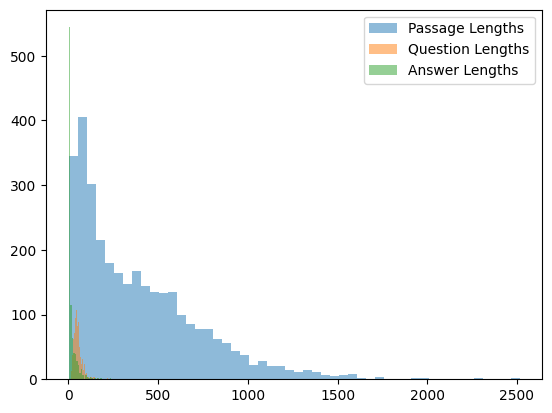

In [17]:
#Check data distribution
import matplotlib.pyplot as plt

passage_lengths = [len(item['passage']) for item in dataset1['passages']]
question_lengths = [len(item['question']) for item in dataset2['test']]
answer_lengths = [len(item['answer']) for item in dataset2['test']]


plt.hist(passage_lengths, bins=50, alpha=0.5, label='Passage Lengths')
plt.hist(question_lengths, bins=50, alpha=0.5, label='Question Lengths')
plt.hist(answer_lengths, bins=50, alpha=0.5, label='Answer Lengths')
plt.legend()
plt.show()

Word Cloud on Passages

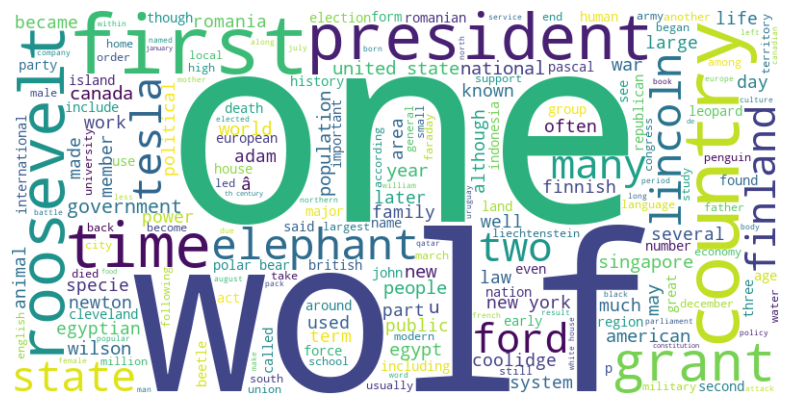

In [18]:
all_words = ' '.join(dataset1['passages']['passage'])
generate_wordcloud(all_words)

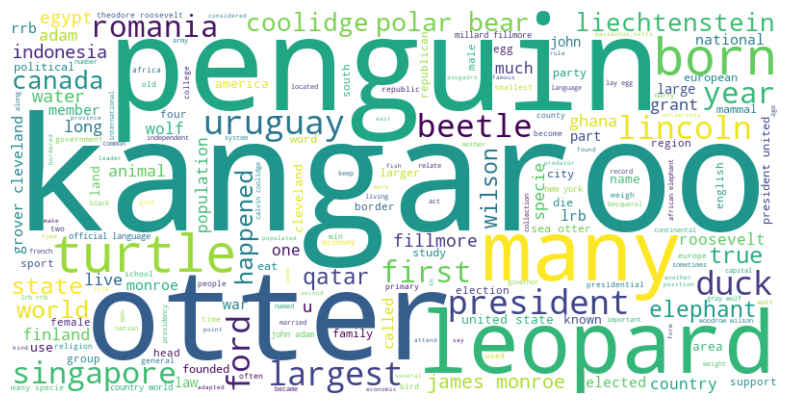

In [19]:
all_words = ' '.join(dataset2['test']['question'])
generate_wordcloud(all_words)

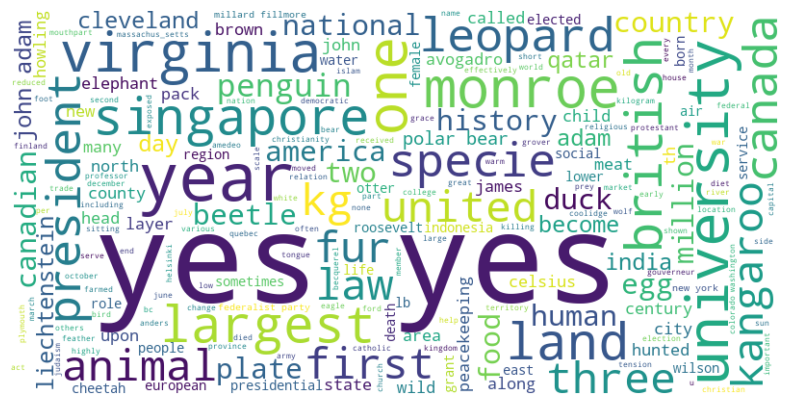

In [20]:
all_words = ' '.join(dataset2['test']['answer'])
generate_wordcloud(all_words)

#### Topic modelling on the passage

In [21]:
all_words = ' '.join(dataset1['passages']['passage'])
normalized_docs = [normalize_text1(text) for text in dataset1['passages']['passage']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


#Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.008*"newton" + 0.005*"year" + 0.004*"roosevelt" + 0.004*"law" + 0.004*"adam" + 0.004*"war" + 0.004*"new" + 0.004*"one" + 0.004*"kangaroo" + 0.004*"leopard"
Topic 1: 0.011*"beetle" + 0.008*"ford" + 0.006*"roosevelt" + 0.005*"family" + 0.005*"president" + 0.004*"tesla" + 0.004*"â" + 0.003*"one" + 0.003*"two" + 0.003*"would"
Topic 2: 0.018*"elephant" + 0.006*"leopard" + 0.005*"african" + 0.005*"one" + 0.004*"population" + 0.004*"time" + 0.003*"first" + 0.003*"specie" + 0.003*"bear" + 0.003*"may"
Topic 3: 0.012*"tesla" + 0.005*"also" + 0.005*"singapore" + 0.004*"american" + 0.003*"work" + 0.003*"history" + 0.003*"time" + 0.003*"power" + 0.003*"one" + 0.003*"state"
Topic 4: 0.023*"wolf" + 0.007*"bear" + 0.006*"lincoln" + 0.005*"roosevelt" + 0.004*"language" + 0.004*"one" + 0.004*"also" + 0.003*"polar" + 0.003*"population" + 0.003*"specie"
Topic 5: 0.007*"wolf" + 0.006*"also" + 0.005*"faraday" + 0.004*"pack" + 0.003*"first" + 0.003*"group" + 0.003*"foreign" + 0.003*"language" + 0.

Topic modelling on the questions

In [22]:
all_words = ' '.join(dataset2['test']['question'])
normalized_docs = [normalize_text1(text) for text in dataset2['test']['question']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


#Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.039*"monroe" + 0.025*"james" + 0.014*"turtle" + 0.010*"president" + 0.009*"world" + 0.009*"u" + 0.008*"law" + 0.007*"country" + 0.007*"liechtenstein" + 0.007*"state"
Topic 1: 0.014*"qatar" + 0.010*"largest" + 0.009*"duck" + 0.009*"rrb" + 0.008*"kangaroo" + 0.008*"living" + 0.008*"lrb" + 0.006*"singapore" + 0.006*"specie" + 0.006*"founded"
Topic 2: 0.024*"happened" + 0.018*"elephant" + 0.015*"bear" + 0.015*"animal" + 0.013*"polar" + 0.012*"water" + 0.010*"bird" + 0.009*"penguin" + 0.007*"canada" + 0.007*"african"
Topic 3: 0.035*"otter" + 0.015*"uruguay" + 0.014*"sea" + 0.014*"beetle" + 0.010*"wolf" + 0.010*"many" + 0.010*"egypt" + 0.009*"live" + 0.008*"population" + 0.008*"john"
Topic 4: 0.015*"world" + 0.012*"election" + 0.012*"largest" + 0.011*"uruguay" + 0.010*"elephant" + 0.010*"mammal" + 0.009*"old" + 0.009*"political" + 0.008*"finland" + 0.008*"party"
Topic 5: 0.019*"specie" + 0.014*"many" + 0.010*"kangaroo" + 0.010*"leopard" + 0.008*"elephant" + 0.008*"bear" + 0.008*"p

Topic modelling on the answers to the above questions

In [23]:
all_words = ' '.join(dataset2['test']['answer'])
normalized_docs = [normalize_text1(text) for text in dataset2['test']['answer']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


#Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

 
#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.009*"first" + 0.009*"united" + 0.009*"fillmore" + 0.009*"james" + 0.009*"howling" + 0.006*"virginia" + 0.006*"specie" + 0.006*"state" + 0.006*"sometimes" + 0.006*"began"
Topic 1: 0.021*"kangaroo" + 0.017*"egg" + 0.013*"meat" + 0.009*"grey" + 0.009*"earns" + 0.009*"partido" + 0.009*"human" + 0.009*"feather" + 0.009*"avogadro" + 0.009*"amedeo"
Topic 2: 0.010*"peacekeeping" + 0.007*"kg" + 0.007*"female" + 0.007*"killing" + 0.007*"head" + 0.007*"bar" + 0.007*"grover" + 0.007*"roo" + 0.007*"leopard" + 0.007*"cleveland"
Topic 3: 0.015*"qatar" + 0.011*"beetle" + 0.011*"million" + 0.007*"year" + 0.007*"century" + 0.007*"new" + 0.007*"region" + 0.007*"social" + 0.007*"economic" + 0.007*"word"
Topic 4: 0.013*"monroe" + 0.010*"bear" + 0.010*"cheetah" + 0.010*"grant" + 0.010*"indonesia" + 0.010*"leopard" + 0.007*"year" + 0.007*"born" + 0.007*"virginia" + 0.007*"cleveland"
Topic 5: 0.020*"british" + 0.015*"india" + 0.010*"largest" + 0.010*"supply" + 0.010*"court" + 0.010*"troop" + 0.010*

#### EDA on Dataset 3

In [24]:
from datasets import get_dataset_config_names, load_dataset

# Specify the dataset name
huggingface_dataset_name = "rag-datasets/rag-mini-bioasq"

# Step 1: List all available configurations for the dataset
configurations = get_dataset_config_names(huggingface_dataset_name)
print("Available configurations:", configurations)

# Step 2: Load the dataset with the desired configuration
# For demonstration, we'll use the first available configuration
config_name = configurations[0]

# Load the dataset with the specified configuration
dataset3 = load_dataset(huggingface_dataset_name, config_name)

df3 = pd.DataFrame(dataset3['passages'])
# Display the dataset
print(dataset3)


Available configurations: ['text-corpus', 'question-answer-passages']
DatasetDict({
    passages: Dataset({
        features: ['passage', 'id'],
        num_rows: 40221
    })
})


In [25]:
config_name = configurations[1]

# Load the dataset with the specified configuration
dataset4 = load_dataset(huggingface_dataset_name, config_name)

df4 = pd.DataFrame(dataset4['test'])
# Display the dataset
print(dataset4)

DatasetDict({
    test: Dataset({
        features: ['question', 'answer', 'relevant_passage_ids', 'id'],
        num_rows: 4719
    })
})


Checking summary length on summary and question answer

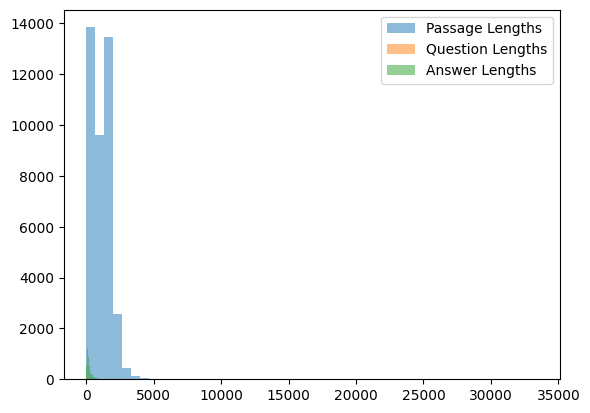

In [26]:
#Check data distribution
import matplotlib.pyplot as plt

passage_lengths = [len(item['passage']) for item in dataset3['passages']]
question_lengths = [len(item['question']) for item in dataset4['test']]
answer_lengths = [len(item['answer']) for item in dataset4['test']]


plt.hist(passage_lengths, bins=50, alpha=0.5, label='Passage Lengths')
plt.hist(question_lengths, bins=50, alpha=0.5, label='Question Lengths')
plt.hist(answer_lengths, bins=50, alpha=0.5, label='Answer Lengths')
plt.legend()
plt.show()

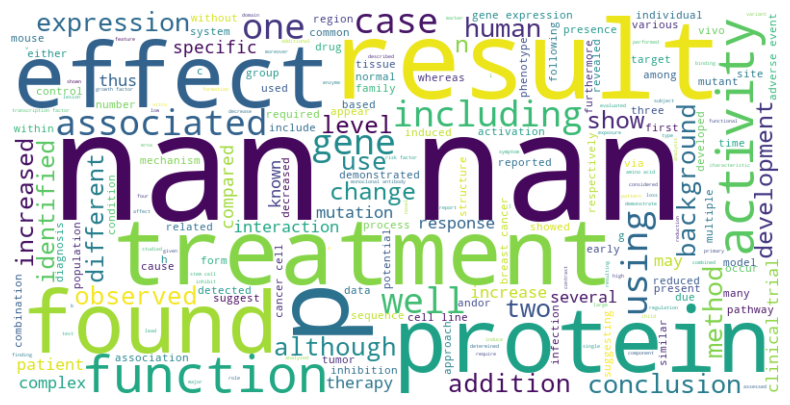

In [27]:
bioasq_dataset = load_dataset("rag-datasets/rag-mini-bioasq", "text-corpus")

all_words = ' '.join(bioasq_dataset['passages']['passage'])
generate_wordcloud(all_words)

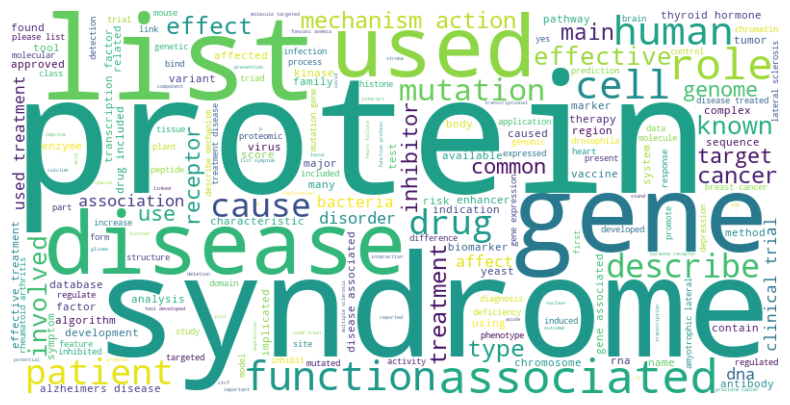

In [29]:
bioasq_dataset1 = load_dataset("rag-datasets/rag-mini-bioasq", "question-answer-passages")

all_words = ' '.join(bioasq_dataset1['test']['question'])
generate_wordcloud(all_words)

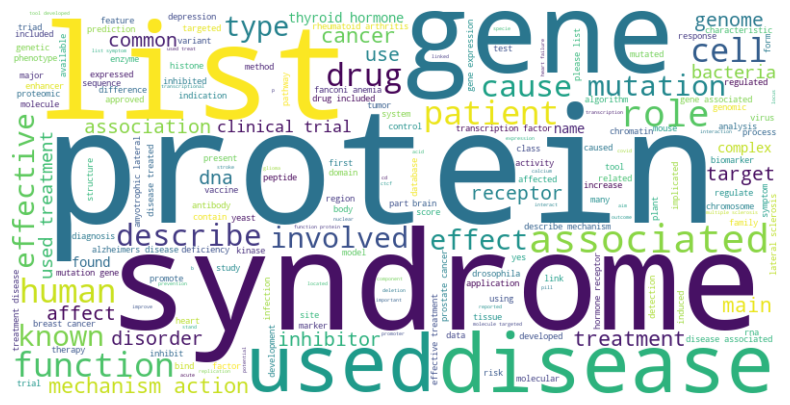

In [30]:
bioasq_dataset2 = load_dataset("rag-datasets/rag-mini-bioasq", "question-answer-passages")

all_words = ' '.join(bioasq_dataset2['test']['question'])
generate_wordcloud(all_words)

Topic modelling on the passage

In [31]:
all_words = ' '.join(bioasq_dataset['passages']['passage'])
normalized_docs = [normalize_text1(text) for text in bioasq_dataset['passages']['passage']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


#Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.024*"protein" + 0.010*"dna" + 0.009*"gene" + 0.008*"complex" + 0.007*"binding" + 0.007*"cell" + 0.006*"domain" + 0.006*"interaction" + 0.006*"function" + 0.006*"rna"
Topic 1: 0.031*"cell" + 0.018*"expression" + 0.009*"mouse" + 0.009*"protein" + 0.009*"role" + 0.009*"disease" + 0.008*"gene" + 0.006*"human" + 0.006*"pathway" + 0.006*"level"
Topic 2: 0.014*"effect" + 0.009*"level" + 0.007*"increased" + 0.007*"activity" + 0.006*"concentration" + 0.006*"rat" + 0.006*"receptor" + 0.006*"mouse" + 0.005*"increase" + 0.005*"heart"
Topic 3: 0.034*"patient" + 0.013*"treatment" + 0.010*"study" + 0.010*"clinical" + 0.009*"trial" + 0.007*"therapy" + 0.007*"group" + 0.007*"drug" + 0.006*"p" + 0.006*"mg"
Topic 4: 0.045*"nan" + 0.036*"cell" + 0.030*"cancer" + 0.019*"tumor" + 0.016*"p" + 0.011*"j" + 0.011*"inhibitor" + 0.011*"kinase" + 0.010*"c" + 0.008*"r"
Topic 5: 0.017*"gene" + 0.009*"data" + 0.009*"method" + 0.009*"analysis" + 0.007*"using" + 0.007*"human" + 0.006*"genome" + 0.006*"sequen

In [32]:
all_words = ' '.join(bioasq_dataset1['test']['question'])
normalized_docs = [normalize_text1(text) for text in bioasq_dataset1['test']['question']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


#Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.025*"gene" + 0.023*"caused" + 0.022*"mutation" + 0.017*"targeted" + 0.013*"function" + 0.012*"list" + 0.009*"receptor" + 0.008*"molecule" + 0.007*"variant" + 0.007*"test"
Topic 1: 0.021*"disease" + 0.014*"protein" + 0.013*"used" + 0.011*"type" + 0.011*"gene" + 0.011*"syndrome" + 0.010*"list" + 0.010*"role" + 0.010*"fda" + 0.009*"common"
Topic 2: 0.031*"drug" + 0.021*"used" + 0.020*"included" + 0.016*"target" + 0.016*"main" + 0.009*"syndrome" + 0.008*"receptor" + 0.008*"effective" + 0.007*"protein" + 0.007*"pill"
Topic 3: 0.021*"drug" + 0.016*"used" + 0.012*"use" + 0.010*"disease" + 0.009*"role" + 0.008*"protein" + 0.008*"list" + 0.008*"pathway" + 0.007*"cancer" + 0.007*"syndrome"
Topic 4: 0.033*"action" + 0.031*"mechanism" + 0.014*"effect" + 0.012*"disease" + 0.012*"rna" + 0.011*"developed" + 0.009*"describe" + 0.009*"function" + 0.008*"cause" + 0.008*"tool"
Topic 5: 0.050*"protein" + 0.012*"list" + 0.011*"describe" + 0.011*"syndrome" + 0.010*"function" + 0.010*"patient" + 0

In [33]:
all_words = ' '.join(bioasq_dataset2['test']['answer'])
normalized_docs = [normalize_text1(text) for text in bioasq_dataset2['test']['answer']]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(normalized_docs)
corpus = [dictionary.doc2bow(text) for text in normalized_docs]

# Set parameters
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2)


#Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


#Vizualise the topics 
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

# If you want to save the visualization as an HTML file:
pyLDAvis.save_html(vis, 'lda_visualization.html')

Topic 0: 0.012*"treatment" + 0.009*"yes" + 0.007*"used" + 0.007*"dna" + 0.005*"rna" + 0.005*"gene" + 0.005*"complex" + 0.004*"inhibitor" + 0.004*"patient" + 0.004*"genome"
Topic 1: 0.007*"disease" + 0.006*"mutation" + 0.006*"protein" + 0.005*"may" + 0.005*"muscle" + 0.005*"gene" + 0.005*"drug" + 0.005*"yes" + 0.005*"dna" + 0.004*"acid"
Topic 2: 0.012*"yes" + 0.009*"gene" + 0.008*"cancer" + 0.008*"cell" + 0.007*"disease" + 0.007*"protein" + 0.005*"expression" + 0.005*"genome" + 0.004*"syndrome" + 0.004*"system"
Topic 3: 0.010*"treatment" + 0.009*"patient" + 0.009*"receptor" + 0.007*"inhibitor" + 0.007*"used" + 0.006*"rna" + 0.006*"factor" + 0.006*"therapy" + 0.005*"clinical" + 0.004*"trial"
Topic 4: 0.014*"cell" + 0.011*"protein" + 0.008*"gene" + 0.006*"also" + 0.006*"yes" + 0.006*"factor" + 0.005*"role" + 0.005*"syndrome" + 0.005*"mutation" + 0.004*"level"
Topic 5: 0.019*"cancer" + 0.009*"patient" + 0.007*"yes" + 0.006*"breast" + 0.006*"study" + 0.005*"human" + 0.005*"used" + 0.005*"tr

Comparing the 2 RAG datasets

#### Basic statistics comparison

In [34]:
from datasets import load_dataset

# Load the datasets
bioasq_dataset = load_dataset("rag-datasets/rag-mini-bioasq", "text-corpus")
wikipedia_dataset = load_dataset('rag-datasets/rag-mini-wikipedia', 'text-corpus')

def get_basic_statistics(dataset, dataset_name):
    num_samples = len(dataset['passages'])
    sample_lengths = [len(item['passage']) for item in bioasq_dataset['passages']]  # Assuming 'context' field

    print(f"Statistics for {dataset_name}:")
    print(f"Number of samples: {num_samples}")

    avg_length = sum(sample_lengths) / num_samples if num_samples > 0 else 0
    min_length = min(sample_lengths)
    max_length = max(sample_lengths)

    
    print(f"Average length of documents: {avg_length:.2f}")
    print(f"Minimum length of documents: {min_length}")
    print(f"Maximum length of documents: {max_length}")
    print()

# Get statistics for both datasets
get_basic_statistics(bioasq_dataset, "BioASQ")
get_basic_statistics(wikipedia_dataset, "Wikipedia")


Statistics for BioASQ:
Number of samples: 40221
Average length of documents: 1032.71
Minimum length of documents: 3
Maximum length of documents: 33420

Statistics for Wikipedia:
Number of samples: 3200
Average length of documents: 12980.17
Minimum length of documents: 3
Maximum length of documents: 33420



In [35]:
!pip install seaborn

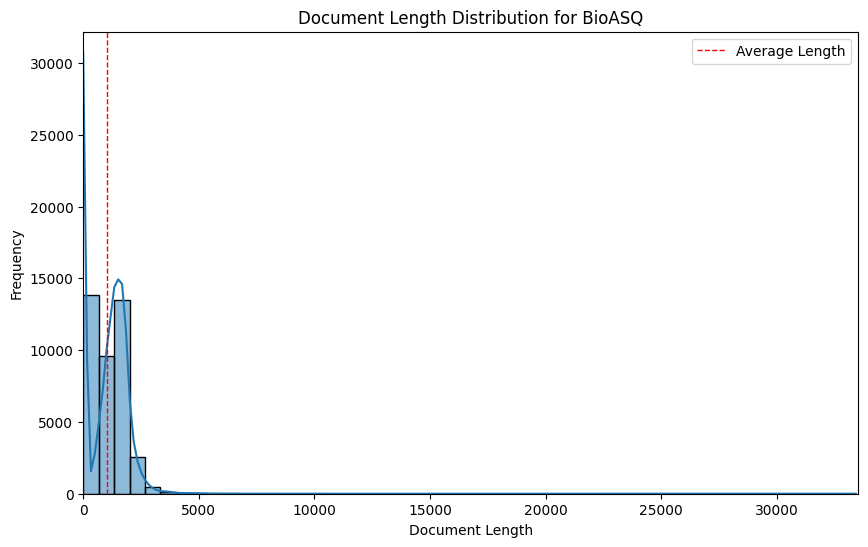

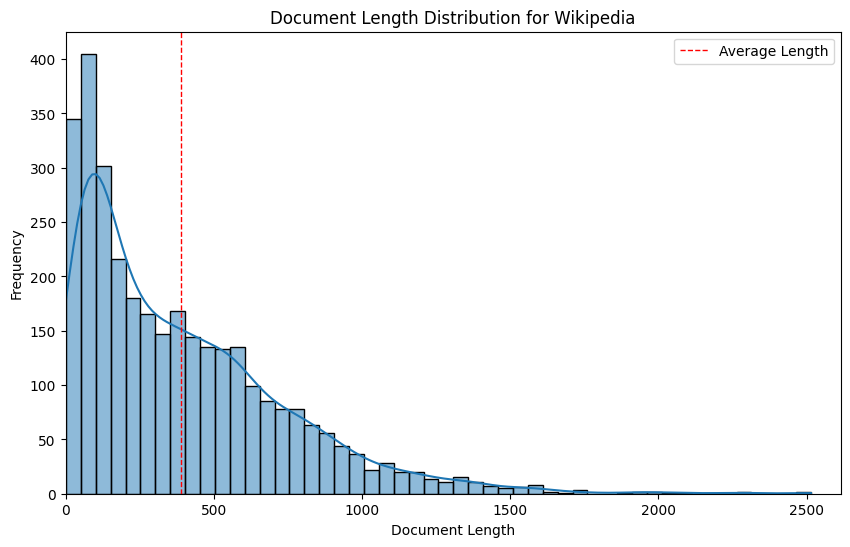

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_length_distribution(dataset, dataset_name):
    sample_lengths = [len(item['passage']) for item in dataset['passages']]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_lengths, bins=50, kde=True)
    plt.title(f'Document Length Distribution for {dataset_name}')
    plt.xlabel('Document Length')
    plt.ylabel('Frequency')
    plt.xlim(0, max(sample_lengths) + 100)
    plt.axvline(sum(sample_lengths) / len(sample_lengths), color='r', linestyle='dashed', linewidth=1, label='Average Length')
    plt.legend()
    plt.show()

# Plot distributions for both datasets
plot_length_distribution(bioasq_dataset, "BioASQ")
plot_length_distribution(wikipedia_dataset, "Wikipedia")


In [37]:
from datasets import load_dataset

# Load the datasets
bioasq_dataset = load_dataset("rag-datasets/rag-mini-bioasq", "question-answer-passages")
wikipedia_dataset = load_dataset('rag-datasets/rag-mini-wikipedia', 'question-answer')

def get_basic_statistics(dataset, dataset_name):
    num_samples = len(dataset['test'])
    sample_lengths = [len(item['question']) for item in dataset['test']]  # Assuming 'context' field

    print(f"Statistics for {dataset_name}:")
    print(f"Number of samples: {num_samples}")

    avg_length = sum(sample_lengths) / num_samples if num_samples > 0 else 0
    min_length = min(sample_lengths)
    max_length = max(sample_lengths)

    
    print(f"Average length of documents: {avg_length:.2f}")
    print(f"Minimum length of documents: {min_length}")
    print(f"Maximum length of documents: {max_length}")
    print()

# Get statistics for both datasets
get_basic_statistics(bioasq_dataset, "BioASQ")
get_basic_statistics(wikipedia_dataset, "Wikipedia")


Statistics for BioASQ:
Number of samples: 4719
Average length of documents: 57.23
Minimum length of documents: 13
Maximum length of documents: 215

Statistics for Wikipedia:
Number of samples: 918
Average length of documents: 53.09
Minimum length of documents: 4
Maximum length of documents: 252



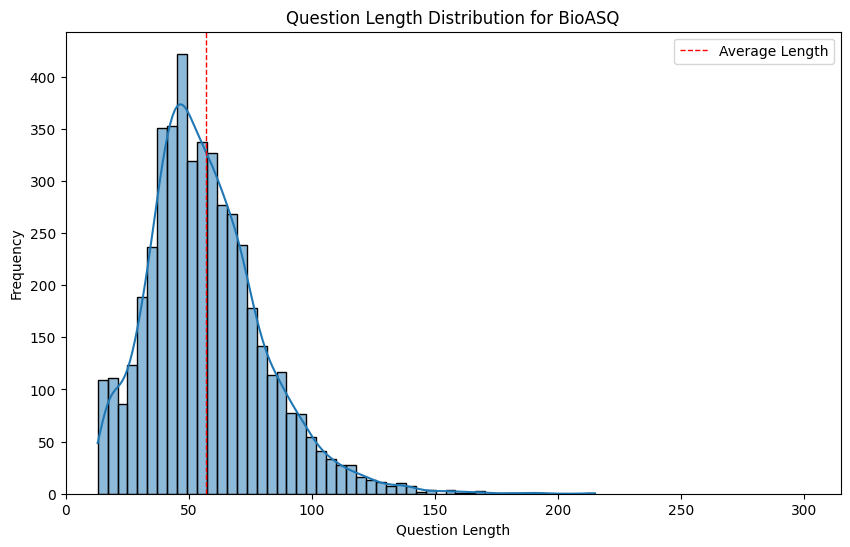

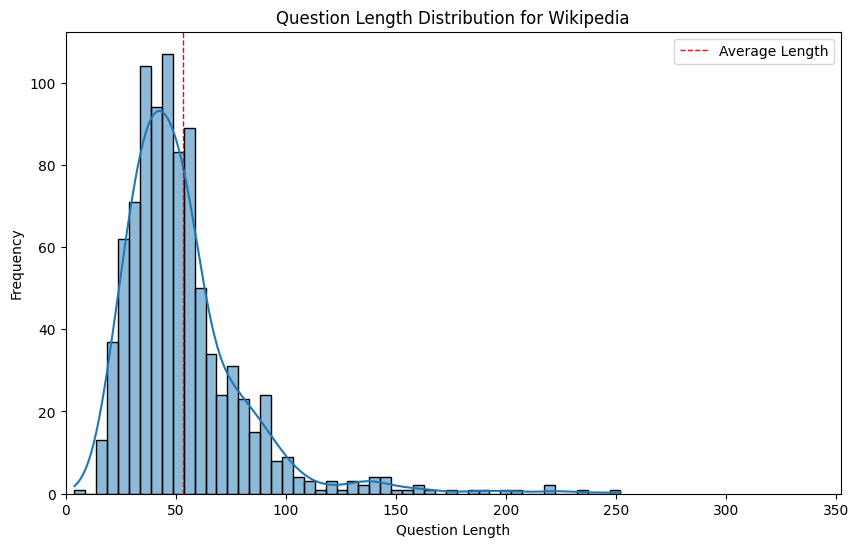

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_length_distribution(dataset, dataset_name):
    sample_lengths = [len(item['question']) for item in dataset['test']]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_lengths, bins=50, kde=True)
    plt.title(f'Question Length Distribution for {dataset_name}')
    plt.xlabel('Question Length')
    plt.ylabel('Frequency')
    plt.xlim(0, max(sample_lengths) + 100)
    plt.axvline(sum(sample_lengths) / len(sample_lengths), color='r', linestyle='dashed', linewidth=1, label='Average Length')
    plt.legend()
    plt.show()

# Plot distributions for both datasets
plot_length_distribution(bioasq_dataset, "BioASQ")
plot_length_distribution(wikipedia_dataset, "Wikipedia")


In [43]:
from datasets import load_dataset

# Load the datasets
bioasq_dataset = load_dataset("rag-datasets/rag-mini-bioasq", "question-answer-passages")
wikipedia_dataset = load_dataset('rag-datasets/rag-mini-wikipedia', 'question-answer')

def get_basic_statistics(dataset, dataset_name):
    num_samples = len(dataset['test'])
    sample_lengths = [len(item['answer']) for item in bioasq_dataset['test']]  # Assuming 'context' field

    print(f"Statistics for {dataset_name}:")
    print(f"Number of samples: {num_samples}")

    avg_length = sum(sample_lengths) / num_samples if num_samples > 0 else 0
    min_length = min(sample_lengths)
    max_length = max(sample_lengths)

    
    print(f"Average length of documents: {avg_length:.2f}")
    print(f"Minimum length of documents: {min_length}")
    print(f"Maximum length of documents: {max_length}")
    print()

# Get statistics for both datasets
get_basic_statistics(bioasq_dataset, "BioASQ")
get_basic_statistics(wikipedia_dataset, "Wikipedia")


Statistics for BioASQ:
Number of samples: 4719
Average length of documents: 253.17
Minimum length of documents: 2
Maximum length of documents: 3146

Statistics for Wikipedia:
Number of samples: 918
Average length of documents: 1301.42
Minimum length of documents: 2
Maximum length of documents: 3146



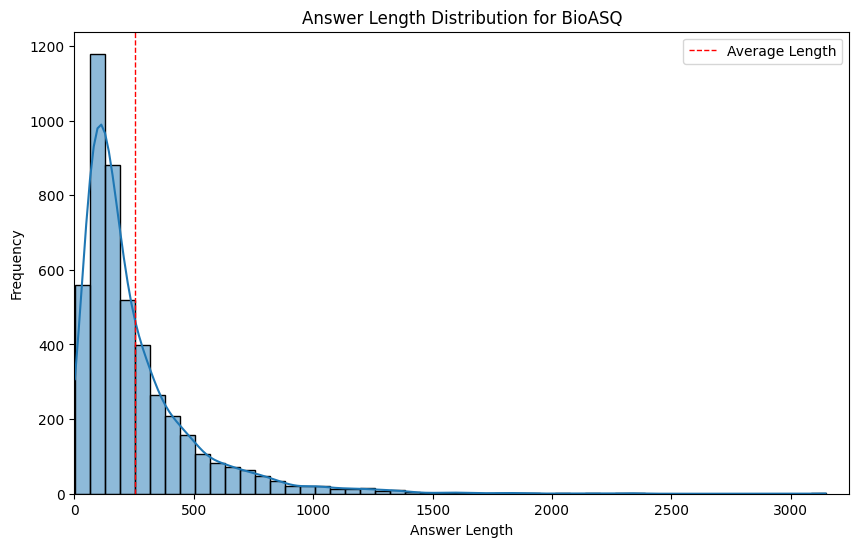

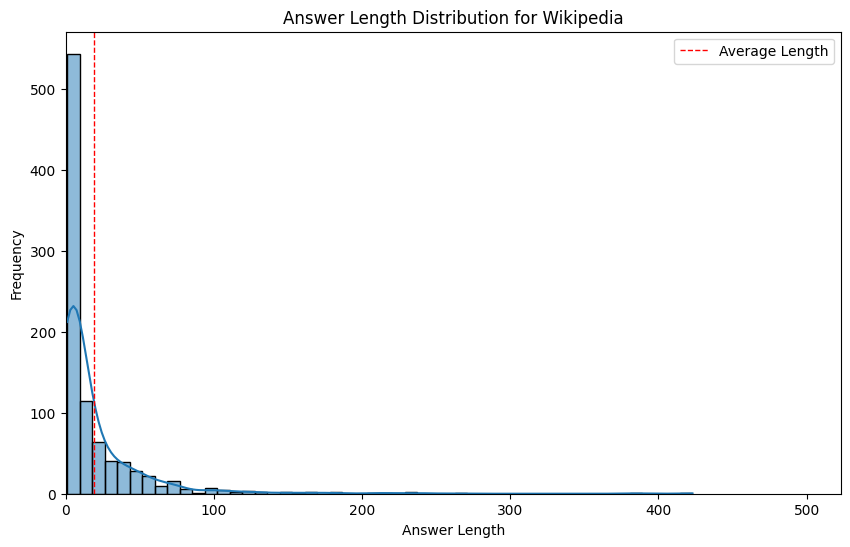

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_length_distribution(dataset, dataset_name):
    sample_lengths = [len(item['answer']) for item in dataset['test']]
    
    plt.figure(figsize=(10, 6))
    sns.histplot(sample_lengths, bins=50, kde=True)
    plt.title(f'Answer Length Distribution for {dataset_name}')
    plt.xlabel('Answer Length')
    plt.ylabel('Frequency')
    plt.xlim(0, max(sample_lengths) + 100)
    plt.axvline(sum(sample_lengths) / len(sample_lengths), color='r', linestyle='dashed', linewidth=1, label='Average Length')
    plt.legend()
    plt.show()

# Plot distributions for both datasets
plot_length_distribution(bioasq_dataset, "BioASQ")
plot_length_distribution(wikipedia_dataset, "Wikipedia")
